<a href="https://colab.research.google.com/github/tej37/logistic-regression/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# logistic_regression



dimention de x: (100, 2)
dimention de y: (100,)


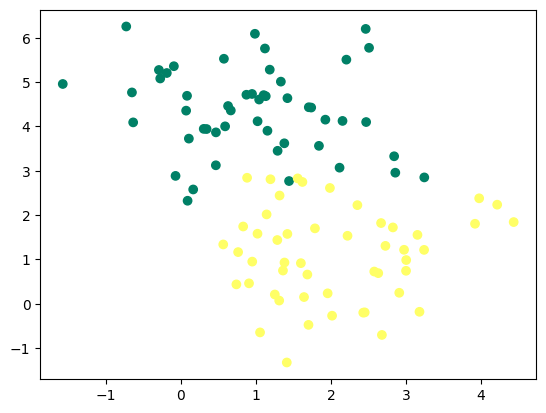

(100, 1)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score
from tqdm import tqdm
x,y=make_blobs(n_samples=100,n_features=2,centers=2,random_state=0)
y.reshape(100,1)
print('dimention de x:',x.shape)
print('dimention de y:',y.shape)
plt.scatter(x[:,0],x[:,1],c=y,cmap='summer')
plt.show()
y=np.array(y)
y=y.reshape(100,1)
print(y.shape)


***initialisation: w,b,z,a***

In [ ]:
def initialisation(x):
  w=np.random.randn(x.shape[1],1)
  b=np.random.randn(1)
  b=np.array(b)
  b=b.reshape(1,1)

  return(w,b)

In [ ]:
#w,b=initialisation(x)

#w.shape
#x.shape


In [ ]:
def partie_linaire(x,w,b):
 """

 Args:
   x:
   w:
   b:

 Returns:

 """
 z=x.dot(w)+b
 #a=1 / (1 + np.exp(-z))
 return z
#print(partie_linaire(x,w,b))

In [ ]:
def sigmoid(z):
  """
  This function calculates the sigmoid of an array of input values.

  Args:
    x: The input array.

  Returns:
    The sigmoid of each element in x.
  """
  return 1 / (1 + np.exp(-z))

# Example usage
#X = np.array([0, 0.5, 1.0])
#y = sigmoid(X)
#print(y)  # Output: [ 0.52499995  0.62275225  0.73105858]


In [ ]:
def model(x,w,b):
  Z=partie_linaire(x,w,b)
  return sigmoid(Z)


In [ ]:
#A=model(x,w,b)
#A.shape
#print(1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A)))
#s=A-y
#s.shape

(100, 1)

**cost function (log loss)**

In [ ]:
def log_loss(y_true, y_pred):
  """
  This function calculates the log loss between true labels and predicted probabilities.

  Args:
    y_true: The true labels, as a numpy array of 0s and 1s.
    y_pred: The predicted probabilities, as a numpy array between 0 and 1.

  Returns:
    The log loss value.
  """
  # Clip y_pred to avoid log(0) errors
  y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)

  # Calculate log loss
  loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
  #loss= 1/len(y_true) * np.sum(-y_true * np.log(y_pred) - (1 - y_true) * np.log(1 -y_pred))
  return loss

# Example usage
#y_true = np.array([1, 0, 1])
#y_pred = np.array([0.8, 0.2, 0.7])
#loss = log_loss(y_true, y_pred)
#print(loss)  # Output: 0.20273296178714374


In [ ]:
#cost=log_loss(y,A)
#print(cost)

In [ ]:
print(len(y))
x.shape
y.reshape(100,1)
#s=np.subtract(A,y,axis=1)
y.shape

100


(100, 1)

In [ ]:
def gradien(A,y,x):
 dl_dw=1/len(y)*np.dot(x.T,(A-y))
 dl_db=1/len(y) * np.sum(A-y)
 return (dl_dw,dl_db)
#dw,db=gradien(A,y,x)
#print(dw)
#print(db)

In [ ]:
def update(w,b,dw,db,learning_rate):
  w=w-learning_rate*dw
  b=b-learning_rate*db
  return(w,b)

In [ ]:
def predict(x,w,b):
  A=model(x,w,b)
  return (A >=0.5)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
def artifical_neuron(x,y,learning_rate=0.01,nb_itr=1000):
  w,b=initialisation(x)
  i=0
  cost=[]
  for i in range(nb_itr):
   A=model(x,w,b)
   cost.append(log_loss(y,A))
   dw,db=gradien(A,y,x)
   w,b=update(w,b,dw,db,learning_rate)

  #print(accuracy_score(y, y_pred))
  plt.plot(cost)
  return (w,b)



In [ ]:
def best_w_b_selon_acc(w,b,acc):
 acc2=acc
 for i in range(300):
  w1,b1=artifical_neuron(x,y,0.01,1000)
  b1=np.array(b1)
  y_pred=predict(x,w1,b1.reshape(1,1))
  if(accuracy_score(y, y_pred)>acc2):
    w,b=w1,b1.reshape(1,1)
    acc2=accuracy_score(y, y_pred)
    print(acc2)
 return(w,b)

0.89
0.92
0.93
0.94
acc final 0.94


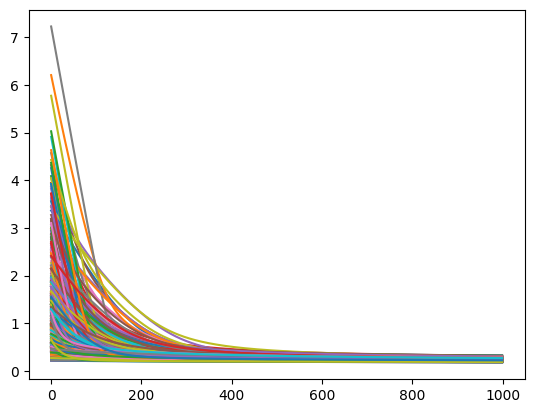

In [ ]:
w1,b1=artifical_neuron(x,y,0.01,1000)
b1=np.array(b1)
b1=b1.reshape(1,1)
y_pred=predict(x,w1,b1)
acc1=accuracy_score(y, y_pred)



w2,b2=best_w_b_selon_acc(w1,b1,acc1)
y_pred2=predict(x,w2,b2)
print('acc final',accuracy_score(y, y_pred2))
#y_pred=np.array(y_pred)
#print(y_pred.shape)

In [ ]:
w2,b2


(array([[ 0.46974381],
        [-1.34523702]]),
 array([[2.69413196]]))

In [ ]:
x0=np.linspace(-1,4,100)
x1=(-w2[0]*x0 - b2)/w2[1]

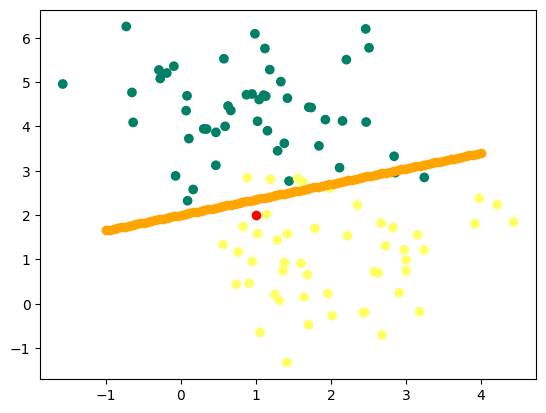

In [ ]:
new_plant=np.array([1,2])
plt.scatter(x[:,0],x[:,1],c=y,cmap='summer')
plt.scatter(new_plant[0],new_plant[1],c='r')
plt.scatter(x0,x1,c='orange')
plt.show()

In [ ]:
print(predict(new_plant,w2,b2))

[[ True]]
